In [3]:
import pandas as pd

# Load the dataset
file_path = "MLE-Assignment.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df_info = df.info()
df_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [4]:
df_head = df.head()
df_head

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [5]:
df_missing = df.isnull().sum()
df_missing

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Drop hsi_id column
df_cleaned = df.drop(columns=["hsi_id"])

In [7]:
# Normalize spectral data (excluding the target variable)
features = df_cleaned.drop(columns=["vomitoxin_ppb"])
target = df_cleaned["vomitoxin_ppb"]

In [8]:
# Standardization (z-score normalization)
features_normalized = (features - features.mean()) / features.std()

# Combine back with target
df_normalized = pd.concat([features_normalized, target], axis=1)


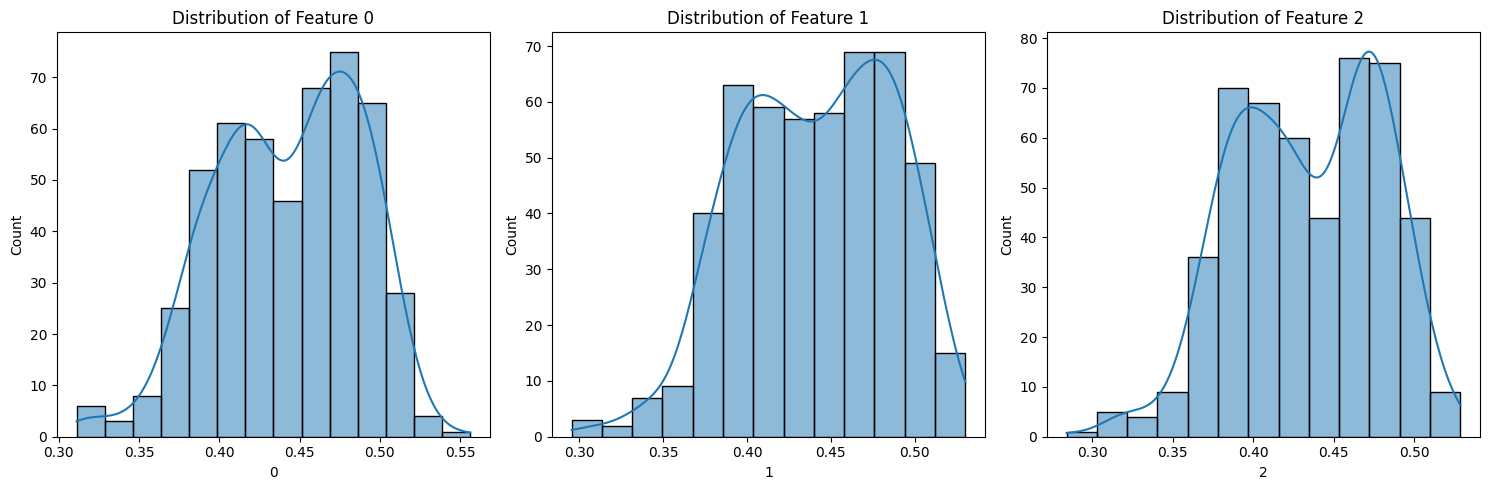

In [9]:
# Plot histograms for a few features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(features.columns[:3]):  # First 3 features
    sns.histplot(df_cleaned[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of Feature {col}")

plt.tight_layout()
plt.show()

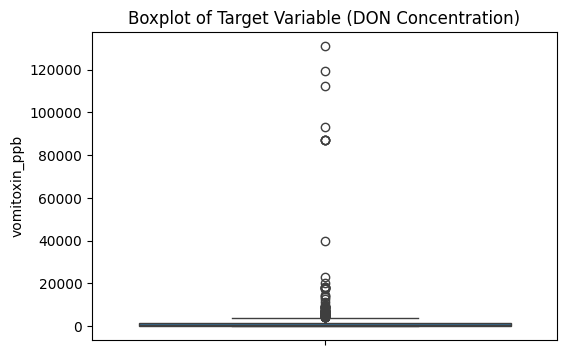

In [10]:
# Boxplot for the target variable
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_cleaned["vomitoxin_ppb"])
plt.title("Boxplot of Target Variable (DON Concentration)")
plt.show()

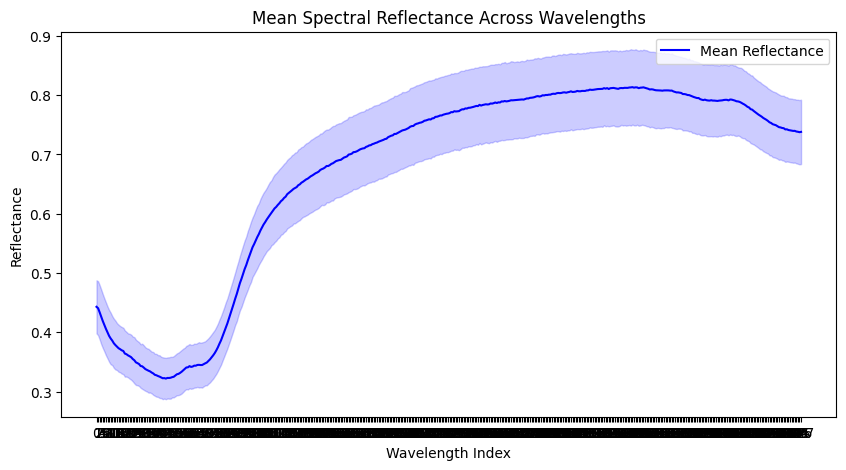

In [11]:
# Line plot for average reflectance over wavelengths
plt.figure(figsize=(10, 5))
plt.plot(features.mean(), label="Mean Reflectance", color="blue")
plt.fill_between(range(len(features.columns)), features.mean() - features.std(), 
                 features.mean() + features.std(), color='blue', alpha=0.2)
plt.title("Mean Spectral Reflectance Across Wavelengths")
plt.xlabel("Wavelength Index")
plt.ylabel("Reflectance")
plt.legend()
plt.show()

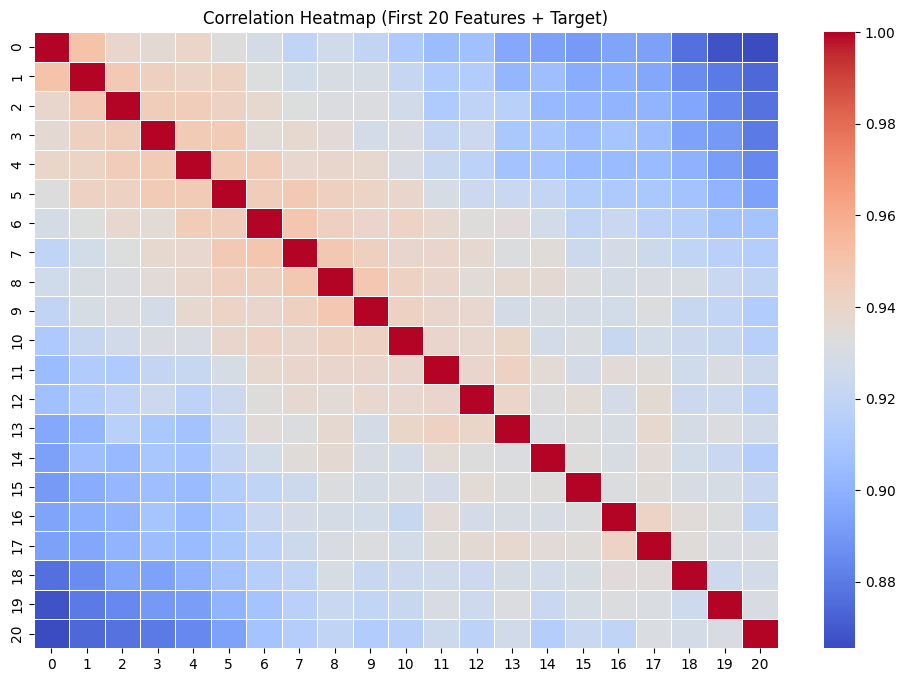

In [12]:
# Correlation heatmap (first 20 features + target for readability)
plt.figure(figsize=(12, 8))
corr_matrix = df_cleaned.iloc[:, :21].corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (First 20 Features + Target)")
plt.show()


# first 20 features are highly correleated as the correleation coefficient is greater than 0.8